In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [4]:
hepatitis_data = pd.read_csv('hepatitis_2_csv.csv')
hepatitis = hepatitis_data.to_numpy()

In [33]:
from sklearn.model_selection import train_test_split

# فرض بر اینه که hepatitis از قبل به صورت NumPy array آماده شده
X = hepatitis[:, 0:19]     # ویژگی‌ها
y = hepatitis[:, 19]       # برچسب‌ها

# تقسیم داده‌ها به ۹۰٪ آموزش و ۱۰٪ تست (یا هر نسبتی که بخوای)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [86]:
lb = LabelBinarizer()
training_labels_bin = lb.fit_transform(y_train)
validating_labels_bin = lb.transform(y_test)

In [87]:
model = Sequential()

In [88]:
model.add(Dense(10, input_dim=19, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

In [90]:
model.add(Dense(1, activation='sigmoid'))

Compiling the ANN

In [91]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=0)

In [93]:
predictions = model.predict(X_test)
predictions_classes = (predictions > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [94]:
accuracy = accuracy_score(validating_labels_bin, predictions_classes)
print(f'Percentage Correct Classification   : {accuracy * 100:.2f}%')
print(f'Percentage Incorrect Classification : {(1 - accuracy) * 100:.2f}%')

Percentage Correct Classification   : 96.49%
Percentage Incorrect Classification : 3.51%


In [95]:
cm = confusion_matrix(y_test, predictions_classes)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 9  1]
 [ 1 46]]


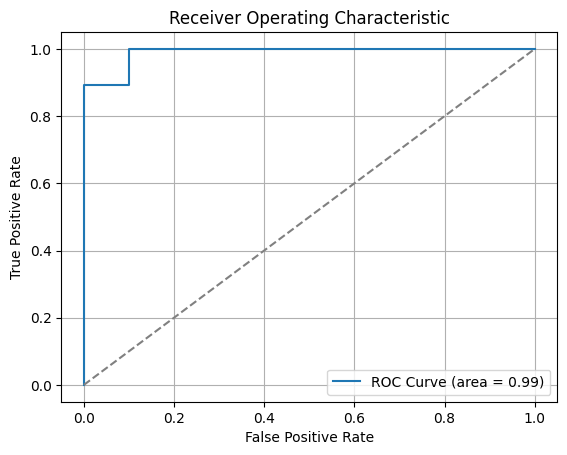

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
